<a href="https://colab.research.google.com/github/vivi928/m.m/blob/main/_1131220_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "my_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8546 - loss: 0.4765 - val_accuracy: 0.9658 - val_loss: 0.1126
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9682 - loss: 0.1028 - val_accuracy: 0.9712 - val_loss: 0.0931
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9790 - loss: 0.0679 - val_accuracy: 0.9714 - val_loss: 0.0936
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9852 - loss: 0.0498 - val_accuracy: 0.9784 - val_loss: 0.0702
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9783 - val_loss: 0.0720
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9895 - loss: 0.0303 - val_accuracy: 0.9800 - val_loss: 0.0761
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
神經網路預測是：9


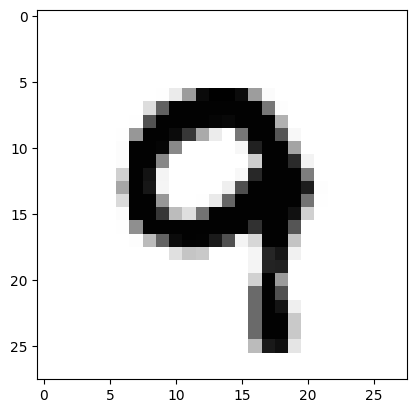

測試集損失：0.0702，測試集精度：0.9784


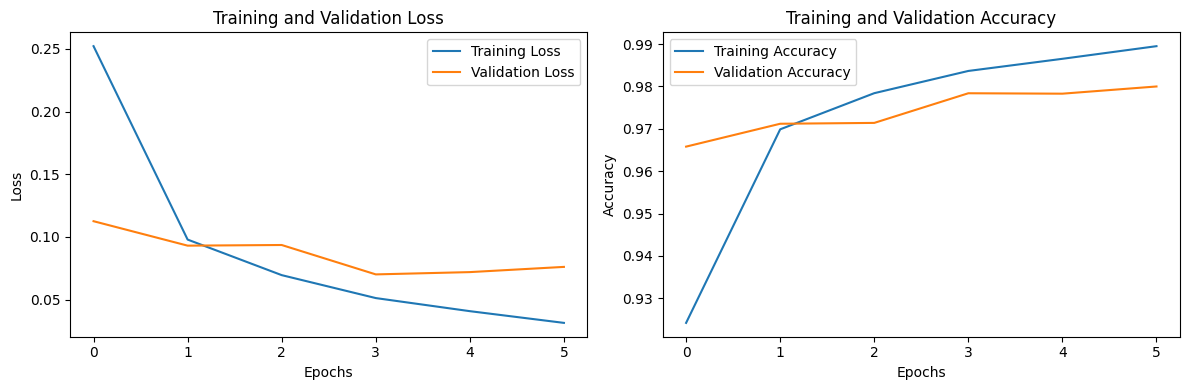

验证损失最低的 epoch 是第 4 个 epoch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load MNIST data
x_train = x_train.reshape(-1, 784) / 255.0  # Flatten and normalize
x_test = x_test.reshape(-1, 784) / 255.0  # Flatten and normalize
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode labels
y_test = to_categorical(y_test, num_classes=10)  # One-hot encode labels

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = Dense(256, activation='relu')
        self.dropout1 = Dropout(0.2)
        self.dense2 = Dense(128, activation='relu')
        self.dropout2 = Dropout(0.2)
        self.dense3 = Dense(64, activation='relu')
        self.dropout3 = Dropout(0.2)
        self.dense4 = Dense(32, activation='relu')
        self.dropout4 = Dropout(0.2)
        self.output_layer = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        x = self.dense3(x)
        x = self.dropout3(x)
        x = self.dense4(x)
        x = self.dropout4(x)
        return self.output_layer(x)

model = MyModel()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

n = 99
predict = np.argmax(model.predict(x_test), axis=1)
print(f"神經網路預測是：{predict[n]}")
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"測試集損失：{loss:.4f}，測試集精度：{accuracy:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

min_val_loss_epoch = np.argmin(history.history['val_loss'])
print(f"验证损失最低的 epoch 是第 {min_val_loss_epoch + 1} 个 epoch")
